In [ ]:
import pandas as pd
MetroPT= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Conference 2024/Datasets/MetroPT.csv')

In [ ]:
# Calculer les quartiles
Q1 = MetroPT['RUL'].quantile(0.25)
Q3 = MetroPT['RUL'].quantile(0.75)
IQR = Q3 - Q1

# Définir les bornes pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifier les valeurs aberrantes
outliers = MetroPT[(MetroPT['RUL'] < lower_bound) | (MetroPT['RUL'] > upper_bound)]

# Compter les valeurs aberrantes
num_outliers = outliers.shape[0]

# Afficher le nombre de valeurs aberrantes
print(f"Nombre de valeurs aberrantes dans la colonne RUL : {num_outliers}")


Nombre de valeurs aberrantes dans la colonne RUL : 0


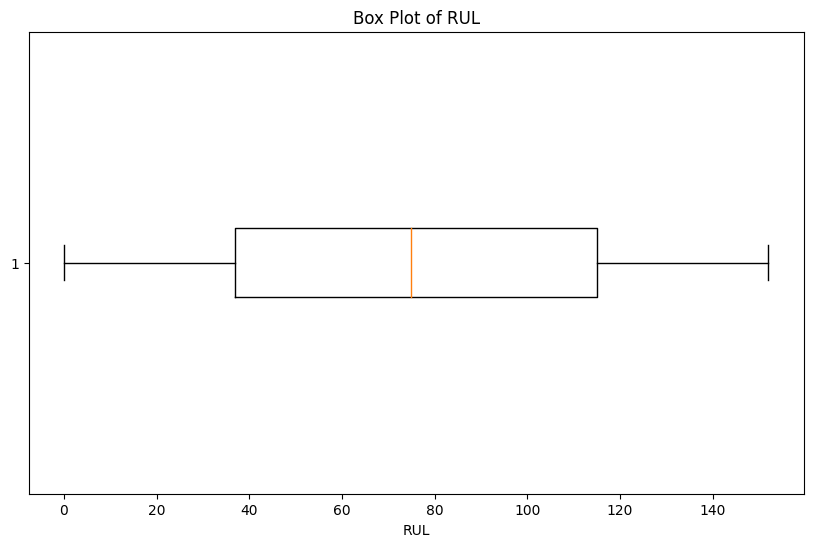

In [ ]:
import matplotlib.pyplot as plt

# Créer une boîte à moustaches pour la colonne RUL
plt.figure(figsize=(10, 6))
plt.boxplot(MetroPT['RUL'], vert=False)
plt.title('Box Plot of RUL')
plt.xlabel('RUL')

# Afficher la boîte à moustaches
plt.show()


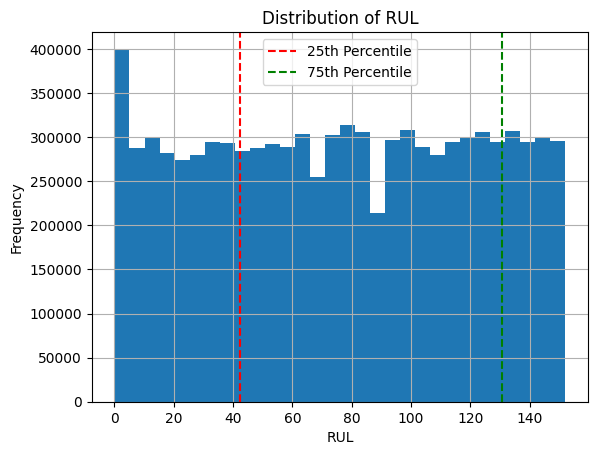

In [ ]:
import matplotlib.pyplot as plt

# Créer un histogramme pour la colonne 'RUL'
MetroPT['RUL'].hist(bins=30)
plt.axvline(x=42.33192, color='r', linestyle='--', label='25th Percentile')
plt.axvline(x=130.4949, color='g', linestyle='--', label='75th Percentile')
plt.xlabel('RUL')
plt.ylabel('Frequency')
plt.title('Distribution of RUL')
plt.legend()
plt.show()


<ipython-input-6-ed2962ad24d5>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(MetroPT['RUL'], shade=True)


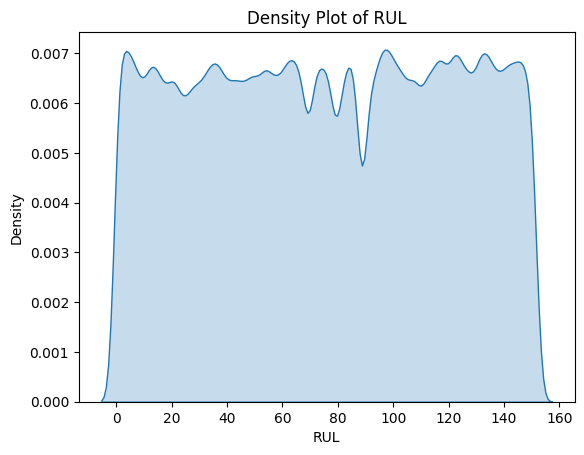

In [ ]:
import seaborn as sns

# Créer une courbe de densité pour la colonne 'RUL'
sns.kdeplot(MetroPT['RUL'], shade=True)
plt.xlabel('RUL')
plt.ylabel('Density')
plt.title('Density Plot of RUL')
plt.show()


In [ ]:

# Fonction pour détecter et supprimer les valeurs aberrantes
def remove_outliers(df):
    # Copier le DataFrame pour éviter de modifier l'original
    df_cleaned = df.copy()

    # Pour chaque colonne numérique
    for col in df_cleaned.select_dtypes(include=['number']).columns:
        # Calculer les quartiles et l'IQR
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1

        # Définir les bornes pour les valeurs aberrantes
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identifier les valeurs aberrantes
        outliers = (df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)

        # Afficher les bornes pour vérification
        print(f"Colonne {col}:")
        print(f"  Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f"  Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

        # Compter les valeurs aberrantes
        num_outliers = outliers.sum()
        print(f"Nombre de valeurs aberrantes dans la colonne {col}: {num_outliers}")

        # Supprimer les valeurs aberrantes
        df_cleaned = df_cleaned[~outliers]

    return df_cleaned
print('La taille du dataset avant la suppression des valeurs aberrantes:', len(MetroPT))

# Appliquer la fonction pour supprimer les valeurs aberrantes
MetroPT= remove_outliers(MetroPT)

print('La taille du dataset après la suppression des valeurs aberrantes:', len(MetroPT))


La taille du dataset avant la suppression des valeurs aberrantes: 8825105
Colonne TP2:
  Q1: -0.0079999999999991, Q3: -0.0060000000000002, IQR: 0.0019999999999989002
  Lower Bound: -0.01099999999999745, Upper Bound: -0.0030000000000018493
Nombre de valeurs aberrantes dans la colonne TP2: 688534
Colonne TP3:
  Q1: 8.474, Q3: 9.362, IQR: 0.8879999999999999
  Lower Bound: 7.142, Upper Bound: 10.693999999999999
Nombre de valeurs aberrantes dans la colonne TP3: 0
Colonne H1:
  Q1: 8.406, Q3: 9.258, IQR: 0.8519999999999985
  Lower Bound: 7.128000000000003, Upper Bound: 10.535999999999998
Nombre de valeurs aberrantes dans la colonne H1: 1
Colonne DV_pressure:
  Q1: -0.032, Q3: -0.0259999999999998, IQR: 0.0060000000000002
  Lower Bound: -0.0410000000000003, Upper Bound: -0.0169999999999995
Nombre de valeurs aberrantes dans la colonne DV_pressure: 0
Colonne Reservoirs:
  Q1: 1.4699999999999989, Q3: 1.638, IQR: 0.16800000000000104
  Lower Bound: 1.2179999999999973, Upper Bound: 1.890000000000001

In [ ]:
# Convertir la colonne 'RUL' en entiers
MetroPT['RUL'] = MetroPT['RUL'].astype(int)

In [ ]:
# Afficher la valeur minimale et maximale de la colonne 'RUL'
print(f"Valeur minimale de 'RUL': {MetroPT['RUL'].min()}")
print(f"Valeur maximale de 'RUL': {MetroPT['RUL'].max()}")


Valeur minimale de 'RUL': 0
Valeur maximale de 'RUL': 152


In [ ]:

# Sauvegarder le DataFrame dans un fichier CSV
MetroPT.to_csv('/content/drive/MyDrive/Colab Notebooks/Conference 2024/Datasets/MetroPT.csv', index=False)